# Data Cleaning and Preprocessing Notebook

### Business Objective
The primary goal is to develop an automated system that effectively summarizes multiple product reviews into concise, informative summaries that capture key aspects of customer feedback (such as overall sentiment score and key product features), enabling both potential customers and business stakeholders to make informed decisions quickly.

**Key Objectives:**

1. `Review Aggregation`: Synthesize multiple reviews per product into a comprehensive yet concise summary that captures the essential feedback and experiences.
2. `Feature Extraction`: Identify and highlight key product features, attributes, and characteristics that customers frequently mention across reviews.
3. `Sentiment Analysis`: Incorporate customer sentiment into summaries to provide balanced perspectives of positive and negative feedback.
4. `Time Efficiency`: Reduce the time needed for customers and stakeholders to understand product feedback by providing digestible summaries instead of reading numerous individual reviews.

### 1. Dataset Description:

#### Overview
The dataset comprises over 568,000 consumer reviews sourced from various products on Amazon.com.

#### Content Structure
The dataset is organized into 10 columns, each providing valuable information about the reviews.

#### Attributes
The dataset includes the following fields:

1. `Id`: A unique identifier for each review.
2. `ProductId`: The unique identifier for the product being reviewed.
3. `UserId`: The unique identifier for the user who submitted the review.
4. `ProfileName`: The name or alias of the user, providing a layer of anonymity.
5. `HelpfulnessNumerator`: The number of users who found the review helpful.
6. `HelpfulnessDenominator`: The total number of users who rated the review as helpful or unhelpful.
7. `Score`: The rating given by the user, typically on a scale from 1 to 5.
8. `Time`: The timestamp indicating when the review was submitted.
9. `Summary`: A brief summary of the review content.
10. `Text`: The full text of the review, providing detailed insights into the user's experience and opinions.


|                  |                                                     |
|--------------------------|---------------------------------------------------------------|
| **Estimated size**       | 568,454 rows and 10 columns (approximately 300 MB)       |
| **Format**               | Comma Separated Values (.csv)                                 |
| **Location & Access**    | Amazon Product Reviews (https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews/data) |

### 2. Setup and Data Loading:
#### Import Libraries
First, we are going to import and install some helper libraries that we will need to process the data.

In [6]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

!pip install contractions
import contractions

import warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ejazl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ejazl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ejazl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ejazl\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### Load Dataset
Next, we are going to load the dataset and examine its structure such as shape, column names, data types and so on.

In [8]:
# Load the data and display some basic information
product_reviews = pd.read_csv('Reviews.csv')
print(f"Dataset shape: {product_reviews.shape}")
print("\nFirst few rows of the dataset:")
product_reviews.head()

Dataset shape: (568454, 10)

First few rows of the dataset:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
# Additional data exploration
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


### 3. Data Cleaning and Preprocessing:
Next, we will streamline our dataset by focusing only on the columns that are essential for our analysis and perform necessary cleaning and preprocessing.

In [11]:
# Select relevant columns
relevant_columns = ['ProductId', 'Text', 'Score', 'HelpfulnessNumerator']
data = product_reviews[relevant_columns].copy()

# Rename columns for clarity
data.columns = ['product_id', 'reviews', 'rating', 'helpful_votes']

In [12]:
# Check the new shape of the dataset
print(data.shape)

# Display the first few rows of the cleaned dataset
print(data.head())

(568454, 4)
   product_id                                            reviews  rating  \
0  B001E4KFG0  I have bought several of the Vitality canned d...       5   
1  B00813GRG4  Product arrived labeled as Jumbo Salted Peanut...       1   
2  B000LQOCH0  This is a confection that has been around a fe...       4   
3  B000UA0QIQ  If you are looking for the secret ingredient i...       2   
4  B006K2ZZ7K  Great taffy at a great price.  There was a wid...       5   

   helpful_votes  
0              1  
1              0  
2              1  
3              3  
4              0  


This approach gives us a more focused dataset for our summarization task. The 'rating' can be used to incorporate sentiment into our summaries or to evaluate how well our summaries capture the overall sentiment. The 'product_id' allows us to group reviews by product and 'review_text' is our main content for summarization.

#### Check for Duplicates and Identify Missing Values
Next, we will check for duplicate rows to ensure that each row is unique and avoid any redundancy in the dataset.

In [15]:
# Check for duplicate records
print(f"Number of duplicate records: {data.duplicated().sum()}")

# Remove duplicate records
data = data.drop_duplicates()
print(f'Total number of unique records after removing duplicates: {data.shape[0]}')

Number of duplicate records: 565
Total number of unique records after removing duplicates: 567889


In [16]:
# Check for missing values
data.isnull().sum()

product_id       0
reviews          0
rating           0
helpful_votes    0
dtype: int64

##### Observations:
- Initial dataset: 568,454 reviews
- After deduplication: 567,889 reviews (565 duplicates removed)
- No missing values in relevant columns

Next, we will group the reviews by product, as it will allow us to summarize multiple reviews for each product and then apply further preprocessing steps later.

In [19]:
def count_sentiments(reviews):
    # Convert reviews to sentiment categories based on rating
    sentiments = [
        'positive' if rating >= 4 
        else 'negative' if rating <= 2 
        else 'neutral' 
        for rating in reviews
    ]
    
    # Count sentiments
    sentiment_counts = {
        'positive': sentiments.count('positive'),
        'neutral': sentiments.count('neutral'),
        'negative': sentiments.count('negative')
    }
    
    return sentiment_counts

In [20]:
# Group by product_id
grouped_reviews = data.groupby('product_id').agg({
    'reviews': list,         # Keep all reviews in a list
    'rating': ['count', 'mean', count_sentiments],  # Get review count, average rating and sentiment distribution
    'helpful_votes': 'sum'
}).reset_index()

# Flatten column names
grouped_reviews.columns = ['product_id', 'reviews', 'review_count', 'avg_rating', 'sentiment_details', 'total_helpful_votes']

### 4. EDA (Exploratory Data Analysis):

#### Basic statistics

In [23]:
print("Basic Statistics:")
print(grouped_reviews.describe())

Basic Statistics:
       review_count    avg_rating  total_helpful_votes
count  74258.000000  74258.000000         74258.000000
mean       7.647513      4.166221            13.342428
std       26.410732      1.070142            64.499431
min        1.000000      1.000000             0.000000
25%        1.000000      3.785138             0.000000
50%        2.000000      4.500000             1.000000
75%        5.000000      5.000000             6.000000
max      911.000000      5.000000          3989.000000


##### Observations:
1. Review Count Statistics:
    - Reviews per product range from 1 to 911
    - Average reviews per product: 7.64
    - Median reviews per product: 2.0
    - High variance in review counts (std: 26.37)
    - Maximum reviews for a single product: 911
    - 75% of products have 5 or fewer reviews
  
2. Average Rating Statistics:
    - Mean rating: 4.17 out of 5
    - Median rating: 4.5 out of 5
    - The high mean and median suggest a strong positive bias in ratings

#### Review Distribution Plot

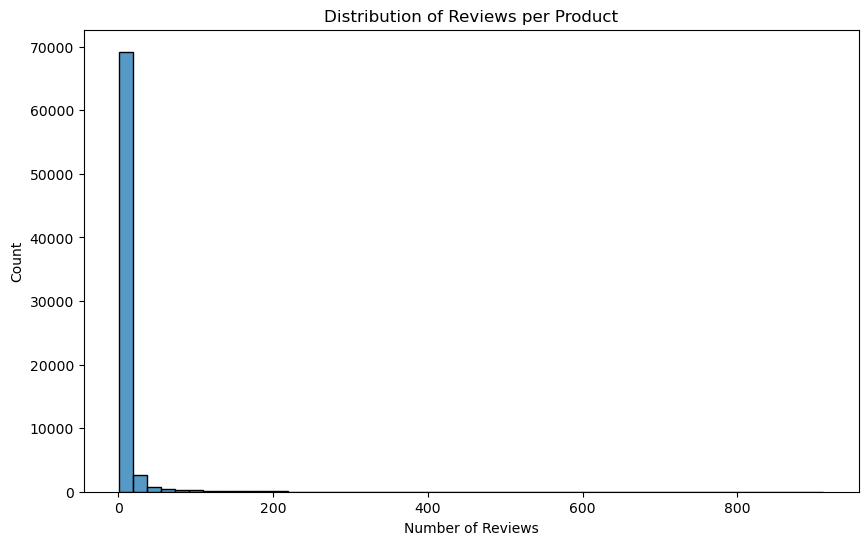

In [26]:
# Visualize review distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=grouped_reviews, x='review_count', bins=50)
plt.title('Distribution of Reviews per Product')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()

##### Observations:
- Highly right-skewed distribution
- Majority of products (>50%) have very few reviews (1-2)
- Long tail extending to 911 reviews
- Implications for summarization:
  * Will probably need different strategies for products with few vs many reviews
  * Or consider minimum review threshold for meaningful summarization and remove outliers

#### Rating Analysis

Text(0.5, 1.0, 'Distribution of Average Ratings')

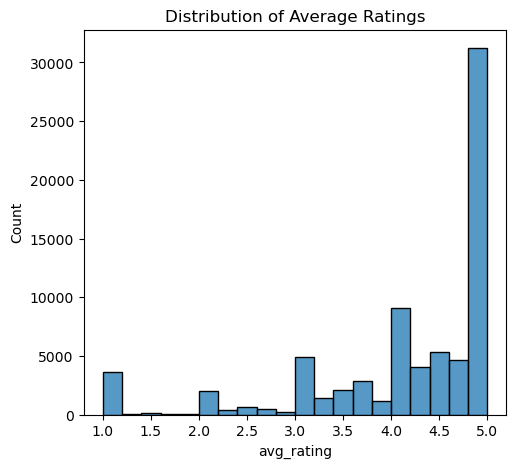

In [29]:
# Rating distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=grouped_reviews, x='avg_rating', bins=20)
plt.title('Distribution of Average Ratings')

##### Observations:
- Strong positive skew in ratings
- Most products have average ratings above 4.0
- Very few products with average ratings below 2.0
- Potential bias in the review quality

### 5. Handling Outliers:

To address the highly skewed distribution of reviews per product, we will implement a two-sided filtering approach: removing products with too few reviews (less than 2) to ensure reliable summarization, and products with excessive reviews (above 95th percentile) to reduce bias from outliers. This balanced approach will help us maintain data quality while ensuring computational efficiency.

In [33]:
# Define review count thresholds
min_reviews = 2            # Minimum reviews for reliable summarization
max_reviews = np.percentile(grouped_reviews['review_count'], 95)  # 95th percentile

# Filter dataset
filtered_reviews = grouped_reviews[
    (grouped_reviews['review_count'] >= min_reviews) & 
    (grouped_reviews['review_count'] <= max_reviews)]

# Print statistics
print("Grouped dataset size:", len(grouped_reviews))
print("Filtered dataset size:", len(filtered_reviews))
print("Removed products:", len(grouped_reviews) - len(filtered_reviews))

# Calculate percentage of data retained
retention_rate = (len(filtered_reviews) / len(grouped_reviews)) * 100
print(f"Retained {retention_rate:.2f}% of the original data")

Grouped dataset size: 74258
Filtered dataset size: 40289
Removed products: 33969
Retained 54.26% of the original data


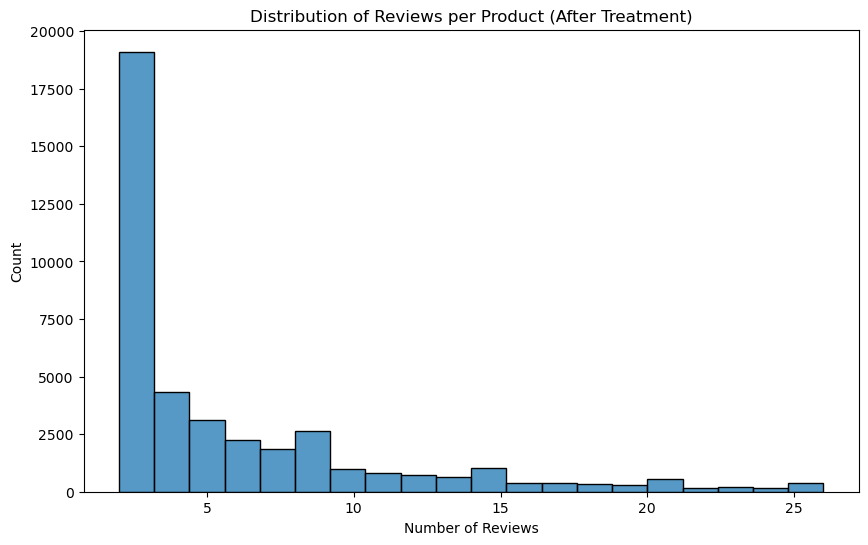

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_reviews, x='review_count', bins=20)
plt.title('Distribution of Reviews per Product (After Treatment)')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()

##### Observations:
- The filtered distribution shows a more manageable range of review counts, eliminating extreme outliers while maintaining the natural pattern of the data
- While still right-skewed, the distribution is less extreme than the original, making it more suitable for subsequent analysis tasks

### 6. Additional Text Preprocessing
Next, we will perform some additional preprocessing steps such as text preprocessing which will be immensely helpful for our NLP tasks where having a clean and clear text data will be essential for further analysis.

We will define couple of functions that will help us clean the text by lowercasing text data, expanding the contractions, removing non-alphabetic characters, tokenizing text into individual words, removing stopwords and lemmatizing. This will help us achieve the desired task of text preprocessing and save the clean text data under new columns.

In [37]:
# Define a text preprocessing function 
def preprocess_text(text):
    text = str(text).lower()                        # convert text to lowercase
    text = contractions.fix(text)                   # expand contractions
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)        # remove non-alphabetic characters
    text = re.sub(r'\S+@\S+', '', text)             # remove email addresses
    text = re.sub(r'\d{3}-\d{3}-\d{4}', '', text)   # remove phone numbers
    text = re.sub(r'\bbr\b', '', text)              # Remove 'br' tags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # remove URLs
    text = re.sub(r'\s+', ' ', text).strip()        # remove extra whitespaces
    
    return text

To reduce the tokenized words to their base or root form, we have couple of options: stemming or lemmatizing. We will proceed with lemmatizing as it is more sophisticated although it can be a little slower than stemming as it is utilizing more resources which ultimately helps us with the reductions being more accurate and meaningful.

In [39]:
# Tokenization, stopword removal, and lemmatization
stop_words = set(stopwords.words('english'))    # remove stopwords
lemmatizer = WordNetLemmatizer()                # lemmatize tokens

def tokenize_lemmatize(text):
    tokens = word_tokenize(text)                # tokenize the text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)      

In [40]:
# Apply preprocessing to each review in the list
filtered_reviews = filtered_reviews.copy()
filtered_reviews['preprocessed_reviews'] = filtered_reviews['reviews'].apply(
    lambda x: [preprocess_text(review) for review in x])

In [41]:
# Apply lemmatizer to each review in the list
filtered_reviews['preprocessed_tokens'] = filtered_reviews['preprocessed_reviews'].apply(
    lambda x: [tokenize_lemmatize(review) for review in x])

In [42]:
# Add combined versions for both preprocessed reviews and tokens
filtered_reviews['comb_preprocessed_reviews'] = filtered_reviews['preprocessed_reviews'].apply(' '.join)
filtered_reviews['comb_preprocessed_tokens'] = filtered_reviews['preprocessed_tokens'].apply(' '.join)

Let's perform some validation checks.

In [44]:
# Add validation checks
def validate_preprocessing(filtered_reviews):
    # Check that we haven't lost any products
    print(f"\nValidation Checks:")
    print(f"Number of unique products in original data: {data['product_id'].nunique()}")
    print(f"Number of products after preprocessing: {len(filtered_reviews)}")
    
    # Check that preprocessed text is not empty
    empty_preprocessed = filtered_reviews['preprocessed_reviews'].apply(lambda x: len(x) == 0).sum()
    print(f"Number of products with empty preprocessed reviews: {empty_preprocessed}")
    
    # Check token lengths
    avg_token_length = filtered_reviews['preprocessed_tokens'].apply(lambda x: len(x[0].split())).mean()
    print(f"Average number of tokens per review: {avg_token_length:.2f}")

# Run validation
validate_preprocessing(filtered_reviews)


Validation Checks:
Number of unique products in original data: 74258
Number of products after preprocessing: 40289
Number of products with empty preprocessed reviews: 0
Average number of tokens per review: 46.63


##### Observations:
- Average token length per review: 46.63 words
- All reviews successfully preprocessed (0 empty reviews)
- All text preprocessing steps completed successfully

### 7. Feature Engineering:

In [47]:
# Add sentiment categories based on average rating
filtered_reviews['sentiment'] = filtered_reviews['avg_rating'].apply(
    lambda x: 'positive' if x >= 4 
    else ('negative' if x <= 2 else 'neutral'))

Next, we will encode the sentiment labels such as ‘Negative’, ‘Neutral’, ‘Positive’ into a numeric scale. This step is important as many machine learning algorithms only work with numeric values.

In [49]:
# Encode the labels
le = LabelEncoder()
filtered_reviews['sentiment_encoded'] = le.fit_transform(filtered_reviews['sentiment'])

# Print the label encoding mapping
print("Label Encoding:")
for name, code in zip(le.classes_, le.transform(le.classes_)):
    print(f"{name}: {code}")

Label Encoding:
negative: 0
neutral: 1
positive: 2


In [50]:
print("\nShape of grouped dataset:", filtered_reviews.shape)
filtered_reviews.sample(5)


Shape of grouped dataset: (40289, 12)


,product_id,reviews,review_count,avg_rating,sentiment_details,total_helpful_votes,preprocessed_reviews,preprocessed_tokens,comb_preprocessed_reviews,comb_preprocessed_tokens,sentiment,sentiment_encoded
37347,B0024VFCRO,[I think this product makes a delicious all-in...,2,3.000000,"{'positive': 1, 'neutral': 0, 'negative': 1}",2,[i think this product makes a delicious all in...,[think product make delicious one meal consist...,i think this product makes a delicious all in ...,think product make delicious one meal consists...,neutral,1
15514,B000LRH852,[I ordered the Krinos Cracked Green Olives. I...,3,5.000000,"{'positive': 3, 'neutral': 0, 'negative': 0}",2,[i ordered the krinos cracked green olives i e...,[ordered krinos cracked green olive enjoyed lo...,i ordered the krinos cracked green olives i en...,ordered krinos cracked green olive enjoyed lot...,positive,2
64610,B005E94ZOY,[The raw almond butter is delicious. The packe...,2,3.000000,"{'positive': 1, 'neutral': 0, 'negative': 1}",2,[the raw almond butter is delicious the packet...,[raw almond butter delicious packet super conv...,the raw almond butter is delicious the packets...,raw almond butter delicious packet super conve...,neutral,1
7570,B000CRIFGM,"[Here's a wonderful ""secret sauce"" you can kee...",6,4.666667,"{'positive': 5, 'neutral': 1, 'negative': 0}",22,[here is a wonderful secret sauce you can keep...,[wonderful secret sauce keep hand perk salad p...,here is a wonderful secret sauce you can keep ...,wonderful secret sauce keep hand perk salad pa...,positive,2
47357,B003HB8D7Q,[Steer clear of these pine nuts imported from ...,8,4.500000,"{'positive': 7, 'neutral': 0, 'negative': 1}",63,[steer clear of these pine nuts imported from ...,[steer clear pine nut imported china implicate...,steer clear of these pine nuts imported from c...,steer clear pine nut imported china implicated...,positive,2


#### Sentiment Distribution Plot

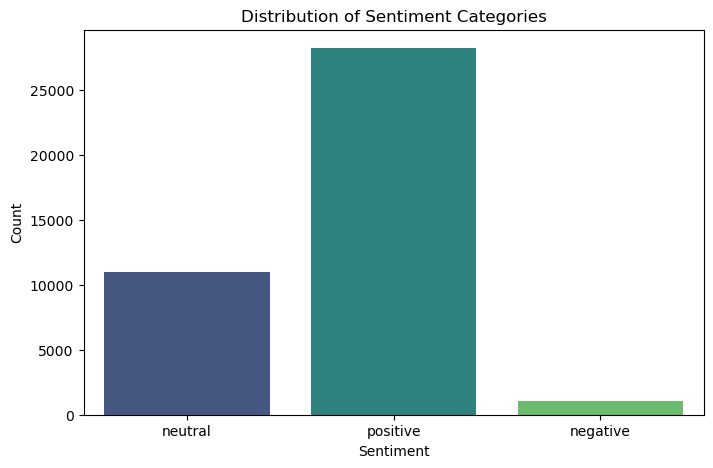

In [52]:
# Create a countplot for sentiment
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=filtered_reviews, palette='viridis')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
# plt.savefig('sentiment_distribution.png')
plt.show()

##### Observations:
- Strong positive bias in the reviews
- Positive sentiment dominates (~60-70% of reviews)
- Relatively few negative reviews (~<5%)
- Neutral reviews form a moderate proportion (~25-35%)
- This confirms the class imbalance and suggests the need for appropriate class balancing techniques

### 8. Summary:
1. **Data Preprocessing Achievements**:
   - Successfully loaded and cleaned 568,454 reviews
   - Removed 565 duplicates
   - Grouped reviews by product (74,258 unique products)
   - Preprocessed text data (lowercase, contractions, special characters)
   - Implemented tokenization and lemmatization

2. **Key Findings**:
   - Strong positive bias in ratings (mean: 4.17, median: 4.5)
   - Highly skewed review distribution (1-911 reviews per product)
   - Class imbalance in sentiment (60-70% positive, 25-35% neutral, <5% negative)
   - Average of 46.63 tokens per review

3. **Challenges Identified**:
   - Significant class imbalance in sentiments
   - Varying number of reviews per product
   - Strong positive rating bias

In [55]:
# Save the processed dataset
filtered_reviews.to_csv('cleaned_reviews.csv', index=False)